# Advanced Visualization

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 8**

Kamis, 10 Juni 2021 • 19:00 - 22:00 WIB

- Waffle Charts (_self learning from module_)
- WordCloud
- Regression Plots
- Violin Plots
- Folium Maps

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Waffle Charts

Menggunakan data dari Sesi 7:

In [2]:
# Membuat dafaframe dari file excel
df_can = pd.read_excel('dataset/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
    usecols=[c for c in range(0, 43)]
)

# Kolom yang tidak terpakai
df_can.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)

# Mengubah nama kolom agar lebih masuk akal
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# Membuat seluruh label kolom bertipe string untuk konsistensi
df_can.columns = list(map(str, df_can.columns))

# Menjadikan kolom Country menjadi indeks
df_can.set_index('Country', inplace=True)

# Menambahkan kolom Total
df_can['Total'] = df_can.sum(axis=1)

# Lihat datanya
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


Melihat studi kasus tentang Denmark, Norwegia, dan Swedia:

In [3]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Menentukan proporsi setiap kategori dari totalnya:

In [4]:
total_values = sum(df_dsn['Total'])
cat_prop = [(float(value) / total_values) for value in df_dsn['Total']]

for i, prop in enumerate(cat_prop):
    print(df_dsn.index.values[i] + ': ' + str(prop))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


Menentukan ukuran keseluruhan dari waffle chart:

In [5]:
wf_width = 40
wf_height = 10

total_num_tiles = wf_width * wf_height
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori:

In [6]:
tiles_per_cat = [round(prop * total_num_tiles) for prop in cat_prop]

for i, tiles in enumerate(tiles_per_cat):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Membuat matriks yang menyerupai waffel dan mengisinya:

In [7]:
waffle_chart = np.zeros((wf_height, wf_width))

cat_index = 0
tile_index = 0

for col in range(wf_width):
    for row in range(wf_height):
        tile_index += 1
        if tile_index > sum(tiles_per_cat[0:cat_index]):
            cat_index += 1
        waffle_chart[row, col] = cat_index

waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Memetakan matriks waffle chart menjadi visual:

In [8]:
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

<Figure size 432x288 with 0 Axes>

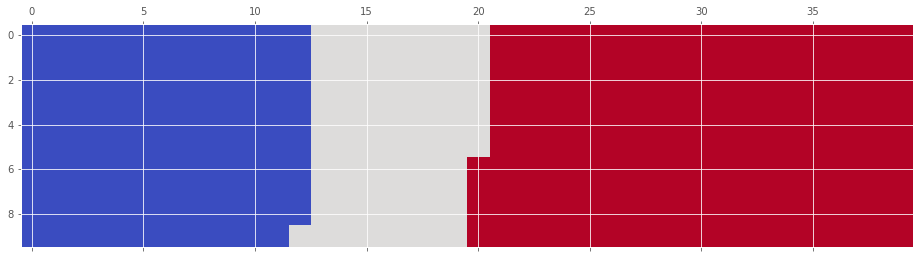

In [9]:
plt.figure()
plt.matshow(waffle_chart, cmap=plt.cm.coolwarm)
plt.show()

<Figure size 432x288 with 0 Axes>

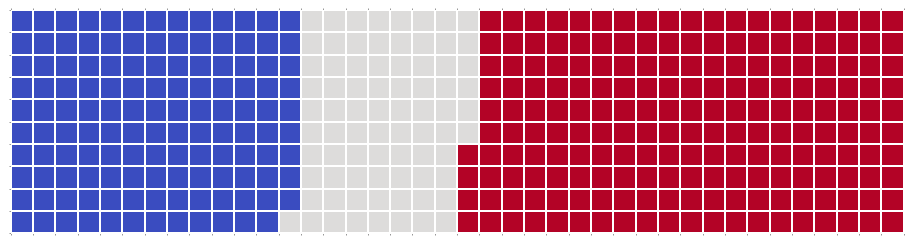

In [10]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (wf_width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (wf_height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.show()

Menambahkan legenda:

<Figure size 432x288 with 0 Axes>

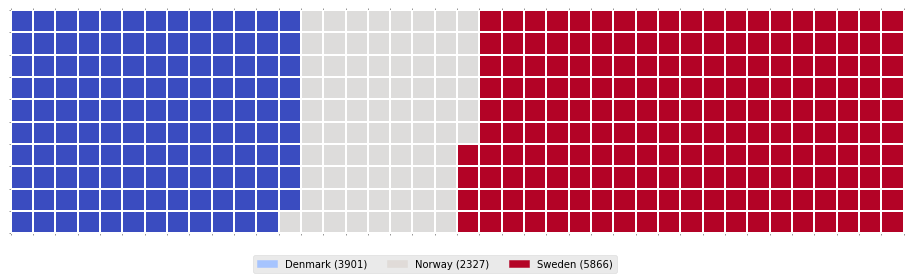

In [11]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (wf_width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (wf_height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

val_cumsum = np.cumsum(df_dsn['Total'])
total_val = val_cumsum[len(val_cumsum) - 1]

legend_handles = []
for i, cat in enumerate(df_dsn.index.values):
    label_str = cat + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(val_cumsum[i] / total_val))
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles, 
    loc='lower center', 
    ncol=len(df_dsn.index.values),
    bbox_to_anchor=(0., -.2, .95, .1)
)

plt.show()

## Word Cloud

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [13]:
with open('dataset/alice_novel.txt', 'r') as f:
    alice_novel = f.read()
print(alice_novel[:500])

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language:


In [14]:
alice_wc = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=2000)
alice_wc.generate(alice_novel)

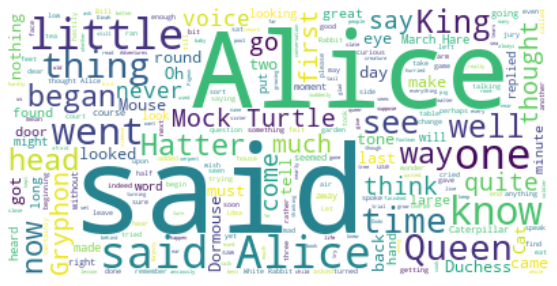

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

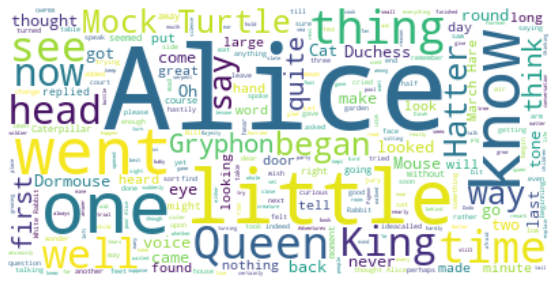

In [16]:
STOPWORDS.add('said')
STOPWORDS.add('much')
STOPWORDS.add('must')

alice_wc.generate(alice_novel)

plt.figure(figsize=(10, 5))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

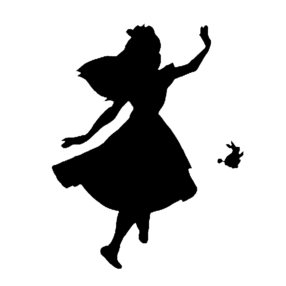

In [17]:
alice_mask = np.array(Image.open('dataset/alice_mask.png'))

plt.figure(figsize=(5, 5))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

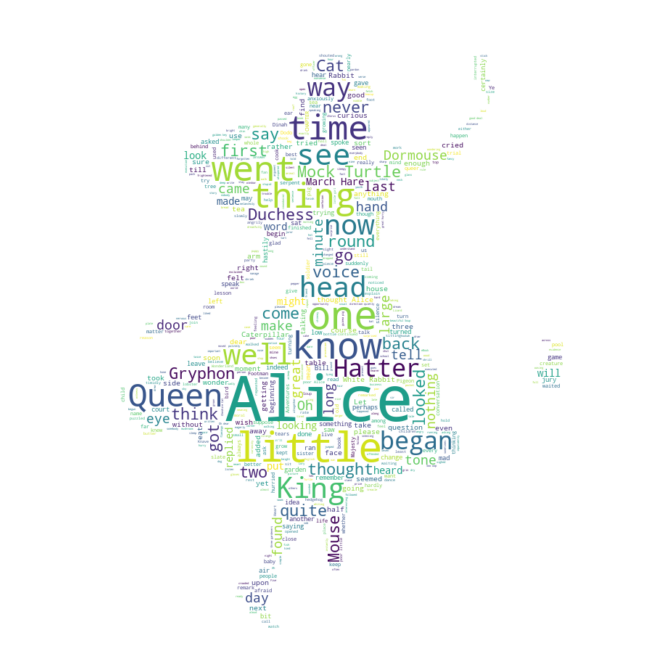

In [18]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=STOPWORDS)
alice_wc.generate(alice_novel)

plt.figure(figsize=(12, 12))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menggunakan data imigrasi:

In [19]:
max_words = 90
country_text = ''

total = df_can['Total'].sum()

for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_country = int(df_can.loc[df_can.index.values == country, 'Total'] / float(total) * max_words)
        country_text = country_text + ((country + ' ')) * repeat_country

print(country_text)

China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania 


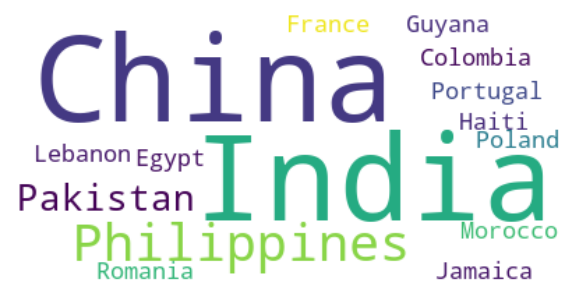

In [20]:
canada_wc = WordCloud(background_color='white').generate(country_text)

plt.figure(figsize=(10, 10))
plt.imshow(canada_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [21]:
import seaborn as sns

In [22]:
years = list(map(str, range(1980, 2014)))

df_total = pd.DataFrame(df_can[years].sum(axis=0))
df_total.index = years
df_total.reset_index(inplace=True)
df_total.columns = ['Years', 'Total']
df_total = df_total.astype(int)
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Years   34 non-null     int32
 1   Total   34 non-null     int32
dtypes: int32(2)
memory usage: 400.0 bytes


,Years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


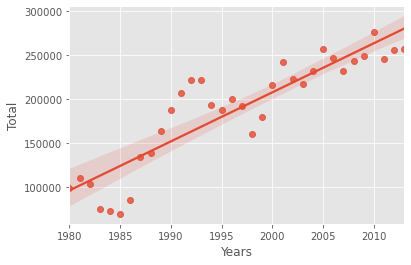

In [23]:
sns.regplot(x='Years', y='Total', data=df_total)
plt.show()

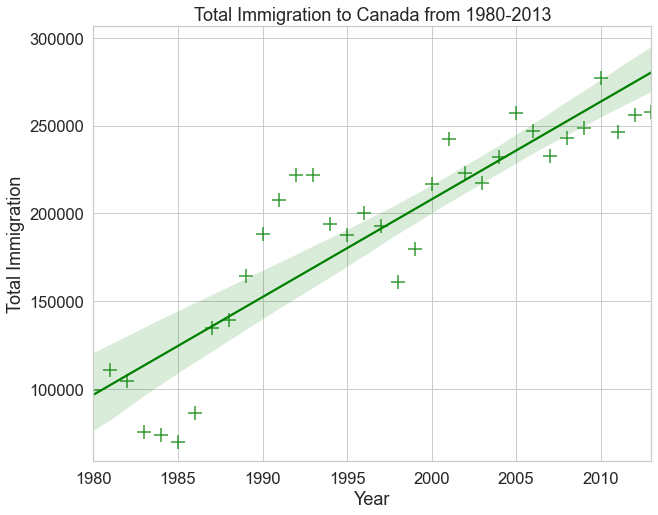

In [24]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.regplot(x='Years', y='Total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Total Immigration')
plt.show()

## Violin Plots

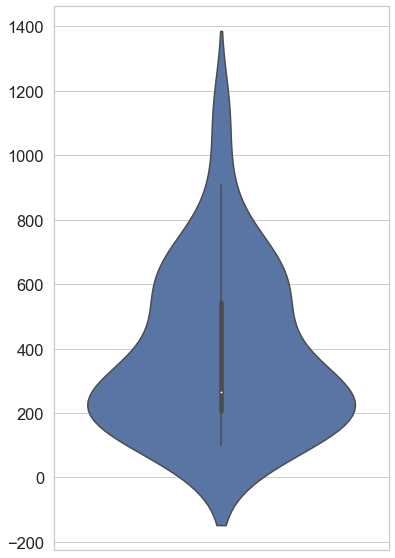

In [27]:
plt.figure(figsize=(6, 10))
sns.violinplot(y=df_can.loc[df_can.index.values == 'Indonesia', years].values)
plt.show()

In [28]:
data_seaborn = sns.load_dataset("tips")
data_seaborn

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


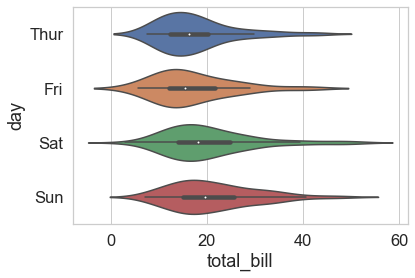

In [29]:
sns.violinplot(x="total_bill", y="day", data=data_seaborn)
plt.show()

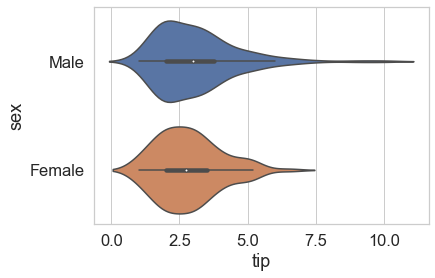

In [30]:
sns.violinplot(x="tip", y="sex", data=data_seaborn)
plt.show()

## Folium (Maps)

In [31]:
import folium

In [32]:
world_map = folium.Map()
world_map

In [33]:
jogja_map = folium.Map(location=[-7.782899764389601, 110.36704328253022], zoom_start=12)
jogja_map

In [34]:
jogja_map = folium.Map(location=[-7.782899764389601, 110.36704328253022], zoom_start=12, tiles='Stamen Terrain')
jogja_map

Impor dataset *police departement incidents*:

In [35]:
df_incidents = pd.read_csv('dataset/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [36]:
df_incidents.shape

(150500, 13)

Ambil sampel acak sebanyak 100 data:

In [37]:
df_incidents_sample = df_incidents.sample(n=100)
df_incidents_sample

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
71633,160423594,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,05/23/2016 12:00:00 AM,18:00,CENTRAL,NONE,FILBERT ST / POWELL ST,-122.411023,37.801170,"(37.8011696432501, -122.411023136542)",16042359428160
7603,160262900,NON-CRIMINAL,"CIVIL SIDEWALKS, CITATION",Wednesday,03/30/2016 12:00:00 AM,16:00,PARK,"ARREST, BOOKED",HAIGHT ST / COLE ST,-122.450710,37.769526,"(37.7695262270693, -122.450709919144)",16026290064002
116701,166067473,NON-CRIMINAL,LOST PROPERTY,Saturday,03/19/2016 12:00:00 AM,16:05,NORTHERN,NONE,POLK ST / OFARRELL ST,-122.419550,37.784959,"(37.7849590112628, -122.419549568783)",16606747371000
143164,160067459,ASSAULT,BATTERY WITH SERIOUS INJURIES,Sunday,01/24/2016 12:00:00 AM,02:06,NORTHERN,"ARREST, BOOKED",1900 Block of UNION ST,-122.431832,37.797610,"(37.7976099463654, -122.431831857814)",16006745904136
139169,160039743,MISSING PERSON,MISSING JUVENILE,Thursday,01/14/2016 12:00:00 AM,08:00,PARK,NONE,500 Block of CENTRAL AV,-122.444432,37.774635,"(37.7746354223627, -122.444432207954)",16003974374010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,160153014,FRAUD,"CREDIT CARD, THEFT BY USE OF",Saturday,02/20/2016 12:00:00 AM,18:20,TENDERLOIN,NONE,100 Block of OFARRELL ST,-122.407222,37.786456,"(37.7864562588009, -122.407222440955)",16015301409320
20054,160435436,MISSING PERSON,MISSING JUVENILE,Friday,05/27/2016 12:00:00 AM,14:00,BAYVIEW,NONE,0 Block of BRIDGEVIEW DR,-122.394490,37.734797,"(37.7347973986896, -122.394489811833)",16043543674010
34963,160191973,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,03/05/2016 12:00:00 AM,17:23,INGLESIDE,"ARREST, BOOKED",5100 Block of MISSION ST,-122.441228,37.716078,"(37.7160781812918, -122.441227673446)",16019197362050
11160,160953507,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,11/23/2016 12:00:00 AM,02:06,MISSION,"ARREST, BOOKED",SHOTWELL ST / 21ST ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",16095350765010


Membuat peta:

In [38]:
# Latitude & Longitude San Fransisco:
lat = 37.75
lon = -122.45

sanfran_map = folium.Map(location=[lat, lon], zoom_start=12)
sanfran_map

In [39]:
incidents = folium.map.FeatureGroup()

for lat, lon in zip(df_incidents_sample.Y, df_incidents_sample.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

sanfran_map.add_child(incidents)

Menambahkan marker:

In [40]:
incidents = folium.map.FeatureGroup()

for lat, lon in zip(df_incidents_sample.Y, df_incidents_sample.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

lats = list(df_incidents_sample.Y)
lons = list(df_incidents_sample.X)
labels = list(df_incidents_sample.Category)

for lat, lon, label in zip(lats, lons, labels):
    folium.Marker([lat, lon], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

Marker dalam lingkaran:

In [41]:
sanfran_map = folium.Map(location=[lat, lon], zoom_start=12)

for lat, lon, label in zip(df_incidents_sample.Y, df_incidents_sample.X, df_incidents_sample.Category):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=label
    ).add_to(sanfran_map)

sanfran_map

Mengelompokkan marker ke dalam cluster yang berbeda:

In [42]:
from folium import plugins

sanfran_map = folium.Map(location=[lat, lon], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lon, label in zip(df_incidents_sample.Y, df_incidents_sample.X, df_incidents_sample.Category):
    folium.Marker(
        location=[lat, lon],
        icon=None,
        popup=label
    ).add_to(incidents)

sanfran_map